In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from astropy.io import fits
from pathlib import Path
from astropy.table import Table
from nikkos_tools import stat_functions as sf
from nikkos_tools import physics_functions as pf
from nikkos_tools.spectrum_tools import line_data, display_lines
RUBIES_DATA = Path('../data').resolve()
FIGURES = Path('./figures').resolve()
RUBY_HEXCODE = '#E0115F'
GRATING_COLORS = [RUBY_HEXCODE, 'k']

In [44]:
def r23_uncertainty(oiii_5007, oiii_5007_ERR, oiii_4959, oiii_4959_ERR, oii, oii_ERR, hb, hb_err):
    numerator = oiii_5007 + oiii_4959 + oii
    numerator_ERR = sf.propagate_uncertainty_addition(sf.propagate_uncertainty_addition(oiii_5007_ERR, oiii_4959_ERR), oii_ERR)
    return sf.propagate_uncertainty_division(numerator, numerator_ERR, hb, hb_err)

line_fluxes = pd.read_csv(RUBIES_DATA.joinpath('line_flux_df.csv'), index_col=0)
line_fluxes_prism = (line_fluxes.loc[:, line_fluxes.columns.str.contains('prism')|(line_fluxes.columns == 'id')]
                     .assign(
                            OIII_Hb = lambda x: x.Oiii_5007_prism/x.Hb_prism,
                            O32 = lambda x: x.Oiii_5007_prism/x.Oii_3727_prism,
                            NeIII_OII = lambda x: x.Neiii_3869_prism/x.Oii_3727_prism,
                            R23 = lambda x: (x.Oiii_5007_prism+x.Oiii_4959_prism+x.Oii_3727_prism)/x.Hb_prism,
                            OIII_Hb_ERR_84 = lambda x: sf.propagate_uncertainty_division(x.Oiii_5007_prism, x.Oiii_5007_prism_p84_err,
                                                  x.Hb_prism, x.Hb_prism_p84_err),
                            OIII_Hb_ERR_16 = lambda x: sf.propagate_uncertainty_division(x.Oiii_5007_prism, x.Oiii_5007_prism_p16_err,
                                                  x.Hb_prism, x.Hb_prism_p16_err),
                            O32_ERR_84 = lambda x: sf.propagate_uncertainty_division(x.Oiii_5007_prism, x.Oiii_5007_prism_p84_err,
                                                  x.Oii_3727_prism, x.Oii_3727_prism_p84_err),
                            O32_ERR_16 = lambda x: sf.propagate_uncertainty_division(x.Oiii_5007_prism, x.Oiii_5007_prism_p16_err,
                                                  x.Oii_3727_prism, x.Oii_3727_prism_p16_err),
                            NeIII_OII_ERR_84 = lambda x: sf.propagate_uncertainty_division(x.Neiii_3869_prism, x.Neiii_3869_prism_p84_err,
                                                  x.Oii_3727_prism, x.Oii_3727_prism_p84_err),
                            NeIII_OII_ERR_16 = lambda x: sf.propagate_uncertainty_division(x.Neiii_3869_prism, x.Neiii_3869_prism_p16_err,
                                                  x.Oii_3727_prism, x.Oii_3727_prism_p16_err), 
                            R23_ERR_84 = lambda x: r23_uncertainty(x.Oiii_5007_prism, x.Oiii_5007_prism_p84_err, 
                                                                   x.Oiii_4959_prism, x.Oiii_4959_prism_p84_err, 
                                                                   x.Oii_3727_prism, x.Oii_3727_prism_p84_err,
                                                                   x.Hb_prism, x.Hb_prism_p84_err),
                            R23_ERR_16 = lambda x: r23_uncertainty(x.Oiii_5007_prism, x.Oiii_5007_prism_p16_err, 
                                                                   x.Oiii_4959_prism, x.Oiii_4959_prism_p16_err, 
                                                                   x.Oii_3727_prism, x.Oii_3727_prism_p16_err,
                                                                   x.Hb_prism, x.Hb_prism_p16_err),
                            L_Ha = lambda x: pf.get_luminosity(np.array(x.z_prism), np.array(x.Ha_prism)*10**-20),
                            L_Ha_ERR_84 = lambda x: pf.get_luminosity(np.array(x.z_prism), np.array(x.Ha_prism_p84_err)*10**-20),
                            L_Ha_ERR_16 = lambda x: pf.get_luminosity(np.array(x.z_prism), np.array(x.Ha_prism_p16_err)*10**-20),
                            L_Hb = lambda x: pf.get_luminosity(np.array(x.z_prism), np.array(x.Hb_prism)*10**-20),
                            L_Hb_ERR_84 = lambda x: pf.get_luminosity(np.array(x.z_prism), np.array(x.Hb_prism_p84_err)*10**-20),
                            L_Hb_ERR_16 = lambda x: pf.get_luminosity(np.array(x.z_prism), np.array(x.Hb_prism_p16_err)*10**-20),
                            L_OIII_5007 = lambda x: pf.get_luminosity(np.array(x.z_prism), np.array(x.Oiii_5007_prism)*10**-20),
                            L_OIII_5007_ERR_84 = lambda x: pf.get_luminosity(np.array(x.z_prism), np.array(x.Oiii_5007_prism_p84_err)*10**-20),
                            L_OIII_5007_ERR_16 = lambda x: pf.get_luminosity(np.array(x.z_prism), np.array(x.Oiii_5007_prism_p16_err)*10**-20)
                            )
)

line_fluxes_g395m = (line_fluxes.loc[:, line_fluxes.columns.str.contains('g395m')|(line_fluxes.columns == 'id')]
                     .assign(
                            OIII_Hb = lambda x: x.Oiii_5007_g395m/x.Hb_g395m,
                            O32 = lambda x: x.Oiii_5007_g395m/x.Oii_3727_g395m,
                            NeIII_OII = lambda x: x.Neiii_3869_g395m/x.Oii_3727_g395m,
                            R23 = lambda x: (x.Oiii_5007_g395m+x.Oiii_4959_g395m+x.Oii_3727_g395m)/x.Hb_g395m,
                            OIII_Hb_ERR_84 = lambda x: sf.propagate_uncertainty_division(x.Oiii_5007_g395m, x.Oiii_5007_g395m_p84_err,
                                                  x.Hb_g395m, x.Hb_g395m_p84_err),
                            OIII_Hb_ERR_16 = lambda x: sf.propagate_uncertainty_division(x.Oiii_5007_g395m, x.Oiii_5007_g395m_p16_err,
                                                  x.Hb_g395m, x.Hb_g395m_p16_err),
                            O32_ERR_84 = lambda x: sf.propagate_uncertainty_division(x.Oiii_5007_g395m, x.Oiii_5007_g395m_p84_err,
                                                  x.Oii_3727_g395m, x.Oii_3727_g395m_p84_err),
                            O32_ERR_16 = lambda x: sf.propagate_uncertainty_division(x.Oiii_5007_g395m, x.Oiii_5007_g395m_p16_err,
                                                  x.Oii_3727_g395m, x.Oii_3727_g395m_p16_err),
                            NeIII_OII_ERR_84 = lambda x: sf.propagate_uncertainty_division(x.Neiii_3869_g395m, x.Neiii_3869_g395m_p84_err,
                                                  x.Oii_3727_g395m, x.Oii_3727_g395m_p84_err),
                            NeIII_OII_ERR_16 = lambda x: sf.propagate_uncertainty_division(x.Neiii_3869_g395m, x.Neiii_3869_g395m_p16_err,
                                                  x.Oii_3727_g395m, x.Oii_3727_g395m_p16_err), 
                            R23_ERR_84 = lambda x: r23_uncertainty(x.Oiii_5007_g395m, x.Oiii_5007_g395m_p84_err, 
                                                                   x.Oiii_4959_g395m, x.Oiii_4959_g395m_p84_err, 
                                                                   x.Oii_3727_g395m, x.Oii_3727_g395m_p84_err,
                                                                   x.Hb_g395m, x.Hb_g395m_p84_err),
                            R23_ERR_16 = lambda x: r23_uncertainty(x.Oiii_5007_g395m, x.Oiii_5007_g395m_p16_err, 
                                                                   x.Oiii_4959_g395m, x.Oiii_4959_g395m_p16_err, 
                                                                   x.Oii_3727_g395m, x.Oii_3727_g395m_p16_err,
                                                                   x.Hb_g395m, x.Hb_g395m_p16_err),
                            L_Ha = lambda x: pf.get_luminosity(np.array(x.z_g395m), np.array(x.Ha_g395m)*10**-20),
                            L_Ha_ERR_84 = lambda x: pf.get_luminosity(np.array(x.z_g395m), np.array(x.Ha_g395m_p84_err)*10**-20),
                            L_Ha_ERR_16 = lambda x: pf.get_luminosity(np.array(x.z_g395m), np.array(x.Ha_g395m_p16_err)*10**-20),
                            L_Hb = lambda x: pf.get_luminosity(np.array(x.z_g395m), np.array(x.Hb_g395m)*10**-20),
                            L_Hb_ERR_84 = lambda x: pf.get_luminosity(np.array(x.z_g395m), np.array(x.Hb_g395m_p84_err)*10**-20),
                            L_Hb_ERR_16 = lambda x: pf.get_luminosity(np.array(x.z_g395m), np.array(x.Hb_g395m_p16_err)*10**-20),
                            L_OIII_5007 = lambda x: pf.get_luminosity(np.array(x.z_g395m), np.array(x.Oiii_5007_g395m)*10**-20),
                            L_OIII_5007_ERR_84 = lambda x: pf.get_luminosity(np.array(x.z_g395m), np.array(x.Oiii_5007_g395m_p84_err)*10**-20),
                            L_OIII_5007_ERR_16 = lambda x: pf.get_luminosity(np.array(x.z_g395m), np.array(x.Oiii_5007_g395m_p16_err)*10**-20)
                            )
)

#Defining signal to noise cuts
snr5007_g395m = (line_fluxes_g395m.Oiii_5007_g395m/line_fluxes_g395m.Oiii_5007_g395m_p16_err > 3)&(line_fluxes_g395m.Oiii_5007_g395m/line_fluxes_g395m.Oiii_5007_g395m_p84_err > 3)&(line_fluxes_g395m.Oiii_5007_g395m < 10000)
snr5007_prism = (line_fluxes_prism.Oiii_5007_prism/line_fluxes_prism.Oiii_5007_prism_p16_err > 3)&(line_fluxes_prism.Oiii_5007_prism/line_fluxes_prism.Oiii_5007_prism_p84_err > 3)&(line_fluxes_prism.Oiii_5007_prism < 10000)
snr4959_g395m = (line_fluxes_g395m.Oiii_4959_g395m/line_fluxes_g395m.Oiii_4959_g395m_p16_err > 3)&(line_fluxes_g395m.Oiii_4959_g395m/line_fluxes_g395m.Oiii_4959_g395m_p84_err > 3)&(line_fluxes_g395m.Oiii_4959_g395m < 10000)
snr4959_prism = (line_fluxes_prism.Oiii_4959_prism/line_fluxes_prism.Oiii_4959_prism_p16_err > 3)&(line_fluxes_prism.Oiii_4959_prism/line_fluxes_prism.Oiii_4959_prism_p84_err > 3)&(line_fluxes_prism.Oiii_4959_prism < 10000)
snr3869_g395m = (line_fluxes_g395m.Neiii_3869_g395m/line_fluxes_g395m.Neiii_3869_g395m_p16_err > 3)&(line_fluxes_g395m.Neiii_3869_g395m/line_fluxes_g395m.Neiii_3869_g395m_p84_err > 3)&(line_fluxes_g395m.Neiii_3869_g395m < 10000)
snr3869_prism = (line_fluxes_prism.Neiii_3869_prism/line_fluxes_prism.Neiii_3869_prism_p16_err > 3)&(line_fluxes_prism.Neiii_3869_prism/line_fluxes_prism.Neiii_3869_prism_p84_err > 3)&(line_fluxes_prism.Neiii_3869_prism < 10000)
snr3727_g395m = (line_fluxes_g395m.Oii_3727_g395m/line_fluxes_g395m.Oii_3727_g395m_p16_err > 3)&(line_fluxes_g395m.Oii_3727_g395m/line_fluxes_g395m.Oii_3727_g395m_p84_err > 3)&(line_fluxes_g395m.Oii_3727_g395m < 10000)
snr3727_prism = (line_fluxes_prism.Oii_3727_prism/line_fluxes_prism.Oii_3727_prism_p16_err > 3)&(line_fluxes_prism.Oii_3727_prism/line_fluxes_prism.Oii_3727_prism_p84_err > 3)&(line_fluxes_prism.Oii_3727_prism < 10000)
snrhb_g395m = (line_fluxes_g395m.Hb_g395m/line_fluxes_g395m.Hb_g395m_p16_err > 3)&(line_fluxes_g395m.Hb_g395m/line_fluxes_g395m.Hb_g395m_p84_err > 3)&(line_fluxes_g395m.Hb_g395m < 10000)
snrhb_prism = (line_fluxes_prism.Hb_prism/line_fluxes_prism.Hb_prism_p16_err > 3)&(line_fluxes_prism.Hb_prism/line_fluxes_prism.Hb_prism_p84_err >3)&(line_fluxes_prism.Hb_prism < 10000)
snrha_g395m = (line_fluxes_g395m.Ha_g395m/line_fluxes_g395m.Ha_g395m_p16_err > 3)&(line_fluxes_g395m.Ha_g395m/line_fluxes_g395m.Ha_g395m_p84_err > 3)&(line_fluxes_g395m.Ha_g395m < 10000)
snrha_prism = (line_fluxes_prism.Ha_prism/line_fluxes_prism.Ha_prism_p16_err > 3)&(line_fluxes_prism.Ha_prism/line_fluxes_prism.Ha_prism_p84_err >3)&(line_fluxes_prism.Ha_prism < 10000)


In [13]:
line_fluxes.columns

Index(['id', 'z_prism', 'z_g395m', 'msaexp_OIII5007_prism',
       'msaexp_e_OIII5007_prism', 'msaexp_OIII5007_g395m',
       'msaexp_e_OIII5007_g395m', 'msaexp_OIII_5007_prism',
       'msaexp_e_OIII_5007_prism', 'msaexp_OIII_5007_g395m',
       'msaexp_e_OIII_5007_g395m', 'Hb_prism', 'Hb_prism_p16_err',
       'Hb_prism_p84_err', 'Hb_g395m', 'Hb_g395m_p16_err', 'Hb_g395m_p84_err',
       'Oiii_4959_prism', 'Oiii_4959_prism_p16_err', 'Oiii_4959_prism_p84_err',
       'Oiii_4959_g395m', 'Oiii_4959_g395m_p16_err', 'Oiii_4959_g395m_p84_err',
       'Oiii_5007_prism', 'Oiii_5007_prism_p16_err', 'Oiii_5007_prism_p84_err',
       'Oiii_5007_g395m', 'Oiii_5007_g395m_p16_err', 'Oiii_5007_g395m_p84_err',
       'Nii_6548_prism', 'Nii_6548_prism_p16_err', 'Nii_6548_prism_p84_err',
       'Nii_6548_g395m', 'Nii_6548_g395m_p16_err', 'Nii_6548_g395m_p84_err',
       'Ha_prism', 'Ha_prism_p16_err', 'Ha_prism_p84_err', 'Ha_g395m',
       'Ha_g395m_p16_err', 'Ha_g395m_p84_err', 'Nii_6584_prism',
    

In [3]:
line_fluxes_prism

,id,z_prism,msaexp_OIII5007_prism,msaexp_e_OIII5007_prism,msaexp_OIII_5007_prism,msaexp_e_OIII_5007_prism,Hb_prism,Hb_prism_p16_err,Hb_prism_p84_err,Oiii_4959_prism,...,NeIII_OII,R23,OIII_Hb_ERR_84,OIII_Hb_ERR_16,O32_ERR_84,O32_ERR_16,NeIII_OII_ERR_84,NeIII_OII_ERR_16,R23_ERR_84,R23_ERR_16
0,280,2.324955,NaN,NaN,NaN,NaN,184.443794,42.061760,45.090660,41.395485,...,0.113325,0.811996,0.222780,0.174754,0.624260,0.498842,0.078577,0.244591,0.360084,0.303536
1,314,1.078537,NaN,NaN,NaN,NaN,108.070034,74.147255,92.805103,243.387177,...,0.003774,5.450729,1.961599,1.542442,0.880610,0.677448,0.105383,0.076666,5.050746,4.081797
2,482,2.499984,NaN,NaN,NaN,NaN,1340.026306,757.767151,844.383860,1133.173279,...,2.275492,1.548546,0.645588,0.606067,12.129516,7.907385,3.635717,2.138066,1.271996,1.075433
3,532,1.387871,NaN,NaN,NaN,NaN,115.218742,71.242218,102.729029,172.276337,...,0.927988,6.000131,2.067008,1.583815,0.847109,0.648961,1.343075,0.909029,6.484330,4.616846
4,761,3.473451,NaN,NaN,NaN,NaN,329.173309,58.330872,53.525104,628.834351,...,0.156194,7.910751,0.747984,0.780162,0.485114,0.426862,0.125301,0.095246,1.380969,1.478112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,975718,7.876692,NaN,NaN,602.85880,26.466034,118.082375,18.187675,18.827400,135.074692,...,1.028352,6.692146,0.844634,0.821804,4.308466,3.511555,0.591207,0.495243,1.152958,1.110218
1273,976141,7.348676,NaN,NaN,159.37079,24.258465,29.639824,17.763917,22.888062,28.767344,...,0.388825,6.990322,3.667698,2.882047,1.924177,1.808293,0.433305,0.362078,5.658838,4.441839
1274,977908,0.302261,NaN,NaN,0.00000,0.000000,30002.985352,13.727539,8.075195,29997.165039,...,0.999619,2.999846,0.000413,0.000526,0.000328,0.000445,0.000410,0.000459,0.000909,0.001457
1275,978590,7.762086,NaN,NaN,169.48310,22.472012,64.691139,28.151119,25.600090,24.763332,...,0.227879,3.665730,1.327340,1.428560,8.259940,4.442236,0.630263,0.705638,1.618117,1.701402


In [6]:
line_fluxes_g395m

,id,z_g395m,msaexp_OIII5007_g395m,msaexp_e_OIII5007_g395m,msaexp_OIII_5007_g395m,msaexp_e_OIII_5007_g395m,Hb_g395m,Hb_g395m_p16_err,Hb_g395m_p84_err,Oiii_4959_g395m,...,NeIII_OII,R23,OIII_Hb_ERR_84,OIII_Hb_ERR_16,O32_ERR_84,O32_ERR_16,NeIII_OII_ERR_84,NeIII_OII_ERR_16,R23_ERR_84,R23_ERR_16
0,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,975718,7.873466,NaN,NaN,376.06590,22.771772,129.813705,21.522256,20.670428,206.251610,...,0.436744,6.907715,0.764244,0.795514,1.675975,1.568431,0.251701,0.233329,1.169630,1.214604
1273,976141,7.346433,NaN,NaN,128.31060,21.253746,80.474503,40.794128,57.232559,54.646858,...,5.922493,2.158697,1.476932,1.095430,18.181991,11.195612,9.555451,5.766002,2.045818,1.473151
1274,977908,NaN,NaN,NaN,35.96833,25.759240,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1275,978590,7.743028,NaN,NaN,135.44159,24.961641,117.840492,74.490652,92.930107,151.518929,...,1.033963,3.810759,2.366198,1.540942,2.954503,1.920553,1.229476,0.900742,3.718877,2.759436


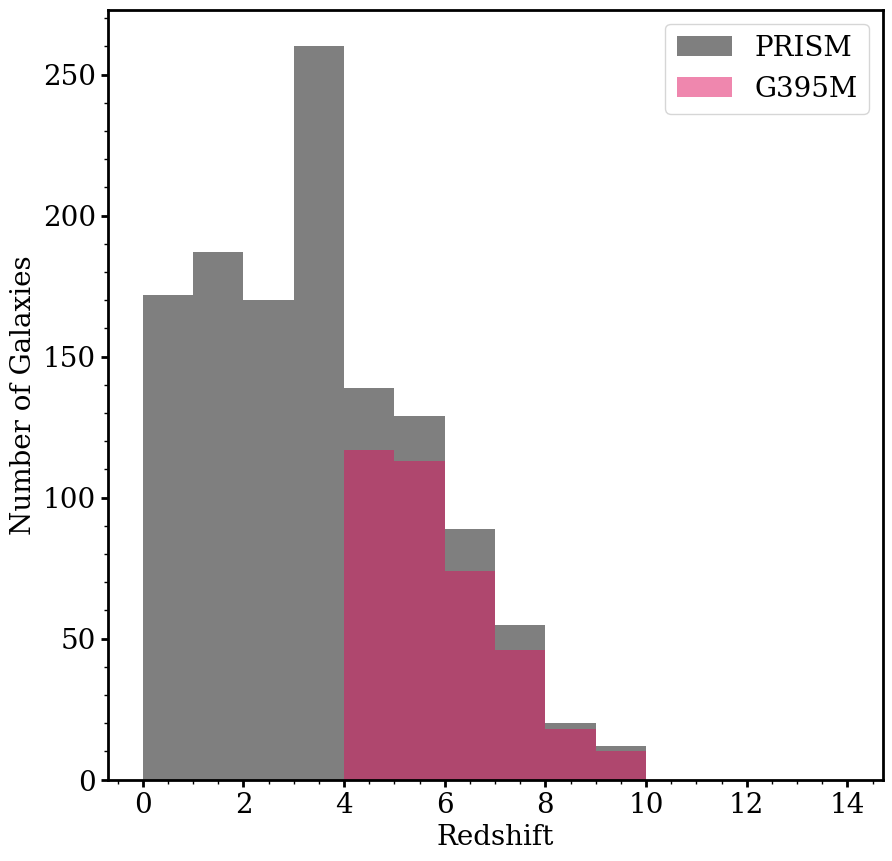

In [3]:
bins = np.arange(0,15,1)
plt.figure(figsize=(10,10))
plt.hist(line_fluxes_prism.z_prism, color='k', alpha=0.5, bins=bins, label='PRISM')
plt.hist(line_fluxes_g395m.z_g395m, color=RUBY_HEXCODE, alpha=0.5, bins=bins, label='G395M')
plt.xlabel('Redshift')
plt.ylabel('Number of Galaxies')
plt.legend()
plt.savefig(FIGURES.joinpath('zhist.pdf'))
plt.show()


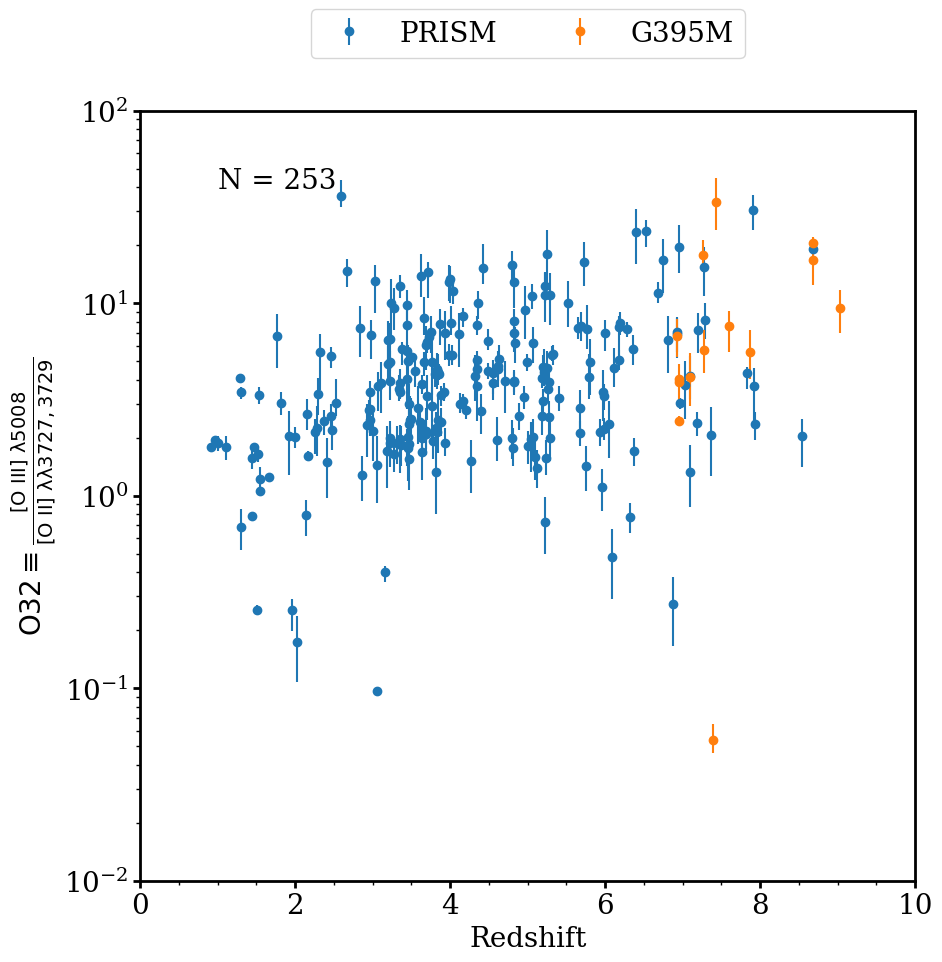

In [4]:
O32df_prism = line_fluxes_prism[snr3727_prism & snr5007_prism]
O32df_g395m = line_fluxes_g395m[snr3727_g395m & snr5007_g395m]
O32df_both = pd.merge(O32df_prism, O32df_g395m, on='id', how='inner')
plt.figure(figsize=(10,10))
plt.errorbar(x=O32df_prism.z_prism, y=O32df_prism.O32, yerr=[O32df_prism.O32_ERR_16, O32df_prism.O32_ERR_84], 
             ls='None', marker='o', label='PRISM')
plt.errorbar(x=O32df_g395m.z_g395m, y=O32df_g395m.O32, yerr=[O32df_g395m.O32_ERR_16, O32df_g395m.O32_ERR_84], 
             ls='None', marker='o', label='G395M')

# a, b = np.polyfit(O32df_prism.z_prism, O32df_prism.Oiii_5007_prism/O32df_prism.Oii_3727_prism, 1)
# plt.plot(np.linspace(0,10,1000), a*np.linspace(0,10,1000)+b, label=f'O32 = {np.round(a, 1)}z + {np.round(b, 1)}')   

plt.annotate(f'N = {len(O32df_prism)+len(O32df_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
plt.xlabel('Redshift')
plt.ylabel(r'$\rm{O32} \equiv \frac{\rm{[O~III]}~\lambda5008}{\rm{[O~II]}~\lambda\lambda3727,3729}$')
plt.yscale('log')
plt.axis([0, 10, 10**-2, 10**2])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=2)
plt.savefig(FIGURES.joinpath('O32_z.pdf'))
plt.show()

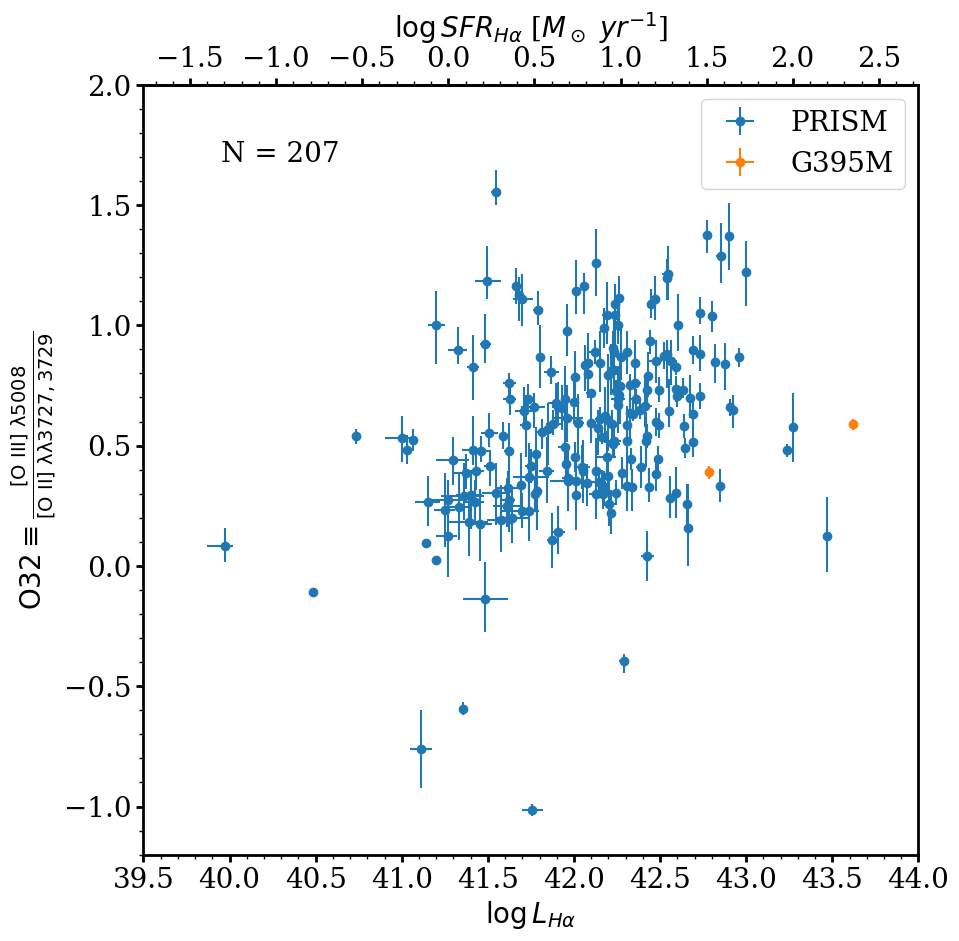

In [17]:
O32Hadf_prism = line_fluxes_prism[snr3727_prism & snr5007_prism & snrha_prism]
O32Hadf_g395m = line_fluxes_g395m[snr3727_g395m & snr5007_g395m & snrha_g395m]
O32Hadf_both = pd.merge(O32Hadf_prism, O32Hadf_g395m, on='id', how='inner')

fig = plt.figure(figsize=(10,10))
gs = GridSpec(nrows=10, ncols=10)
gs.update(wspace=0, hspace=2)

ax = fig.add_subplot(gs[0:10, 0:10])
ax.errorbar(x=np.log10(O32Hadf_prism.L_Ha), y=np.log10(O32Hadf_prism.O32), 
            xerr=[sf.propagate_uncertainty_log10(O32Hadf_prism.L_Ha,O32Hadf_prism.L_Ha_ERR_16), sf.propagate_uncertainty_log10(O32Hadf_prism.L_Ha,O32Hadf_prism.L_Ha_ERR_84)],
            yerr=[sf.propagate_uncertainty_log10(O32Hadf_prism.O32,O32Hadf_prism.O32_ERR_16), sf.propagate_uncertainty_log10(O32Hadf_prism.O32,O32Hadf_prism.O32_ERR_84)],
            ls='None', marker='o', label='PRISM')
ax.errorbar(x=np.log10(O32Hadf_g395m.L_Ha), y=np.log10(O32Hadf_g395m.O32), 
            xerr=[sf.propagate_uncertainty_log10(O32Hadf_g395m.L_Ha,O32Hadf_g395m.L_Ha_ERR_16), sf.propagate_uncertainty_log10(O32Hadf_g395m.L_Ha,O32Hadf_g395m.L_Ha_ERR_84)],
            yerr=[sf.propagate_uncertainty_log10(O32Hadf_g395m.O32,O32Hadf_g395m.O32_ERR_16), sf.propagate_uncertainty_log10(O32Hadf_g395m.O32,O32Hadf_g395m.O32_ERR_84)],
            ls='None', marker='o', label='G395M')

plt.annotate(f'N = {len(O32Hadf_prism)+len(O32Hadf_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
plt.xlabel(r'$\log L_{H\alpha}$')
plt.ylabel(r'$\rm{O32} \equiv \frac{\rm{[O~III]}~\lambda5008}{\rm{[O~II]}~\lambda\lambda3727,3729}$')
secax = ax.secondary_xaxis('top', functions=(lambda x: x-41.27, lambda x: x+41.27))
secax.set_xlabel(r'$\log SFR_{H\alpha}$ [$M_\odot~yr^{-1}$]', labelpad=6.0)
plt.axis([39.5, 44, -1.2, 2])
plt.legend()
plt.savefig(FIGURES.joinpath('O32_ha.pdf'))
plt.show()

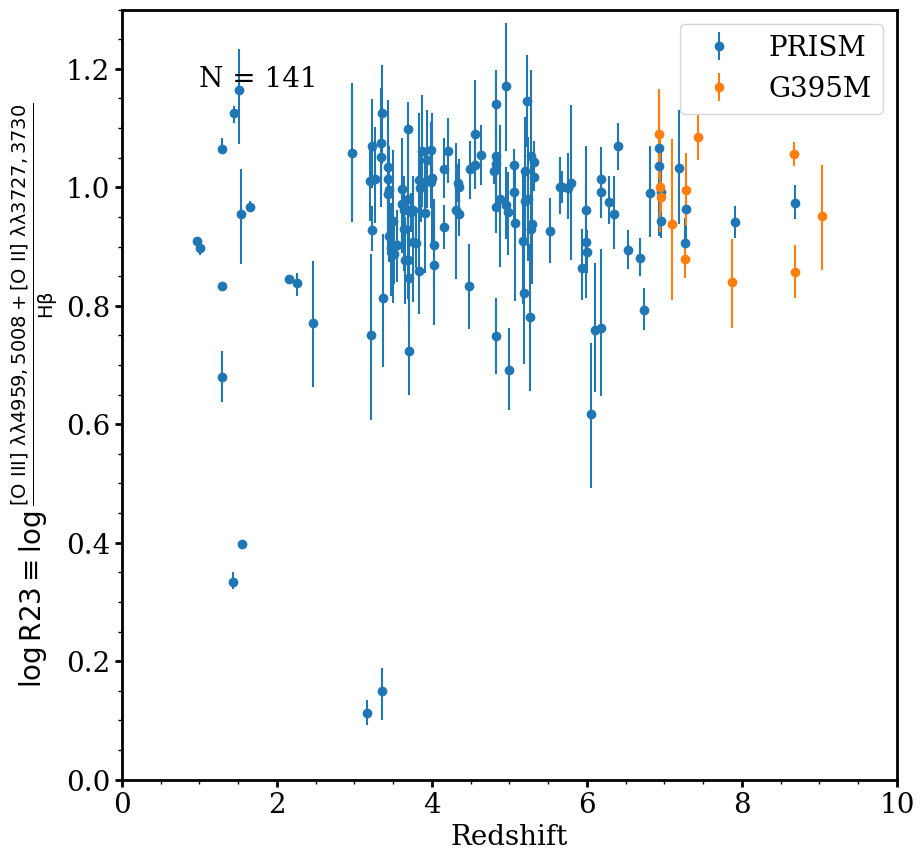

In [24]:
R23df_prism = line_fluxes_prism[snr3727_prism & snrhb_prism & snr5007_prism & snr4959_prism]
R23df_g395m = line_fluxes_g395m[snr3727_g395m & snrhb_g395m & snr5007_g395m & snr4959_g395m]
R23df_both = pd.merge(R23df_prism, R23df_g395m, on='id', how='inner')
plt.figure(figsize=(10,10))
plt.errorbar(x=R23df_prism.z_prism, y=np.log10(R23df_prism.R23), 
             yerr=[sf.propagate_uncertainty_log10(R23df_prism.R23,R23df_prism.R23_ERR_16), sf.propagate_uncertainty_log10(R23df_prism.R23,R23df_prism.R23_ERR_84)], 
             ls='None', marker='o', zorder=-1, label='PRISM')
plt.errorbar(x=R23df_g395m.z_g395m, y=np.log10(R23df_g395m.R23), 
             yerr=[sf.propagate_uncertainty_log10(R23df_g395m.R23,R23df_g395m.R23_ERR_16), sf.propagate_uncertainty_log10(R23df_g395m.R23,R23df_g395m.R23_ERR_84)], 
             ls='None', marker='o', zorder=-1, label='G395M')

# a, b = np.polyfit(O32df_prism.z_prism, O32df_prism.Oiii_5007_prism/O32df_prism.Oii_3727_prism, 1)
# plt.plot(np.linspace(0,10,1000), a*np.linspace(0,10,1000)+b, label=f'O32 = {np.round(a, 1)}z + {np.round(b, 1)}')   

plt.annotate(f'N = {len(R23df_prism)+len(R23df_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
plt.xlabel('Redshift')
plt.ylabel(r'$\log\rm{R23} \equiv \log\frac{\rm{[O~III]}~\lambda\lambda 4959,5008 + \rm{[O~II]}~\lambda\lambda3727,3730}{H\beta}$')

# plt.yscale('log')
plt.axis([0, 10, 0, 1.3])
plt.legend()
plt.savefig(FIGURES.joinpath('R23_z.pdf'))
plt.show()

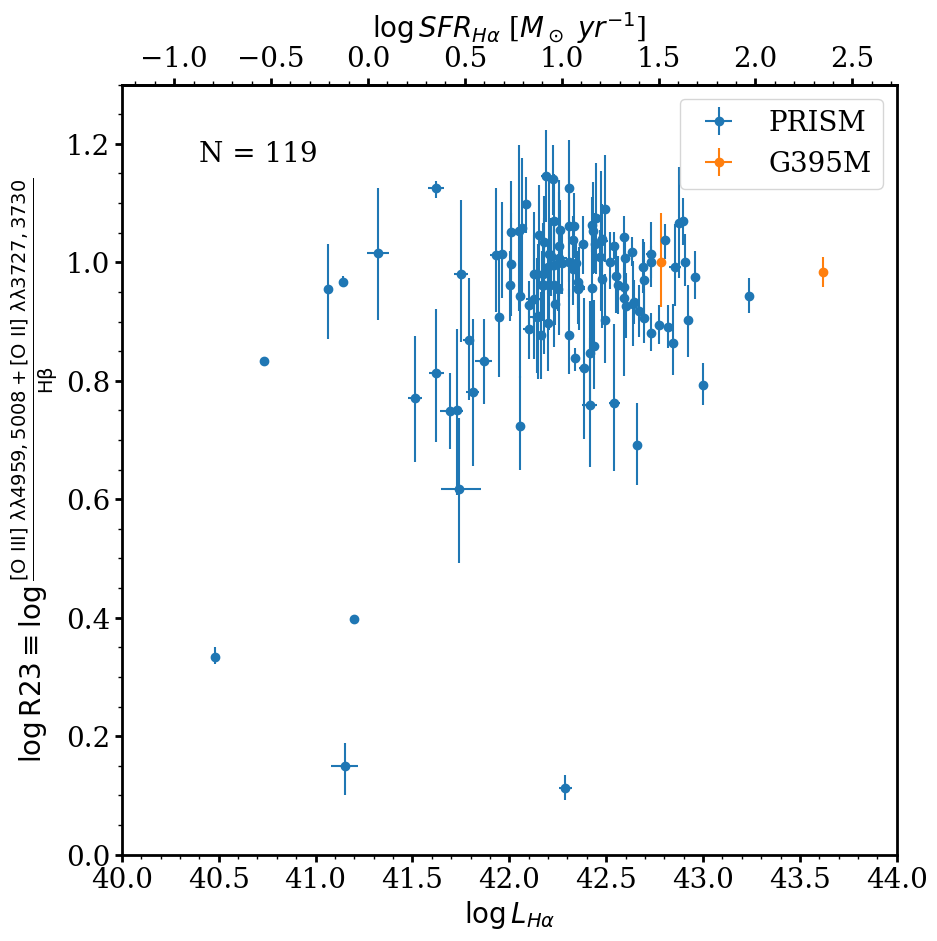

In [27]:
R23Hadf_prism = line_fluxes_prism[snr3727_prism & snrhb_prism & snr5007_prism & snr4959_prism & snrha_prism]
R23Hadf_g395m = line_fluxes_g395m[snr3727_g395m & snrhb_g395m & snr5007_g395m & snr4959_g395m & snrha_g395m]
R23Hadf_both = pd.merge(R23Hadf_prism, R23Hadf_g395m, on='id', how='inner')

fig = plt.figure(figsize=(10,10))
gs = GridSpec(nrows=10, ncols=10)
gs.update(wspace=0, hspace=0)

ax = fig.add_subplot(gs[0:10, 0:10])
ax.errorbar(x=np.log10(R23Hadf_prism.L_Ha), y=np.log10(R23Hadf_prism.R23), 
            xerr=[sf.propagate_uncertainty_log10(R23Hadf_prism.L_Ha,R23Hadf_prism.L_Ha_ERR_16), sf.propagate_uncertainty_log10(R23Hadf_prism.L_Ha,R23Hadf_prism.L_Ha_ERR_84)],
            yerr=[sf.propagate_uncertainty_log10(R23Hadf_prism.R23,R23Hadf_prism.R23_ERR_16), sf.propagate_uncertainty_log10(R23Hadf_prism.R23,R23Hadf_prism.R23_ERR_84)],
            ls='None', marker='o', label='PRISM')
ax.errorbar(x=np.log10(R23Hadf_g395m.L_Ha), y=np.log10(R23Hadf_g395m.R23), 
            xerr=[sf.propagate_uncertainty_log10(R23Hadf_g395m.L_Ha,R23Hadf_g395m.L_Ha_ERR_16), sf.propagate_uncertainty_log10(R23Hadf_g395m.L_Ha,R23Hadf_g395m.L_Ha_ERR_84)],
            yerr=[sf.propagate_uncertainty_log10(R23Hadf_g395m.R23,R23Hadf_g395m.R23_ERR_16), sf.propagate_uncertainty_log10(R23Hadf_g395m.R23,R23Hadf_g395m.R23_ERR_84)],
            ls='None', marker='o', label='G395M')

plt.annotate(f'N = {len(R23Hadf_prism)+len(R23Hadf_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
plt.xlabel(r'$\log L_{H\alpha}$')
plt.ylabel(r'$\log\rm{R23} \equiv \log\frac{\rm{[O~III]}~\lambda\lambda 4959,5008 + \rm{[O~II]}~\lambda\lambda3727,3730}{H\beta}$')
secax = ax.secondary_xaxis('top', functions=(lambda x: x-41.27, lambda x: x+41.27))
secax.set_xlabel(r'$\log SFR_{H\alpha}$ [$M_\odot~yr^{-1}$]', labelpad=6.0)
plt.axis([40, 44, 0, 1.3])
plt.legend()
plt.savefig(FIGURES.joinpath('R23_ha.pdf'))
plt.show()

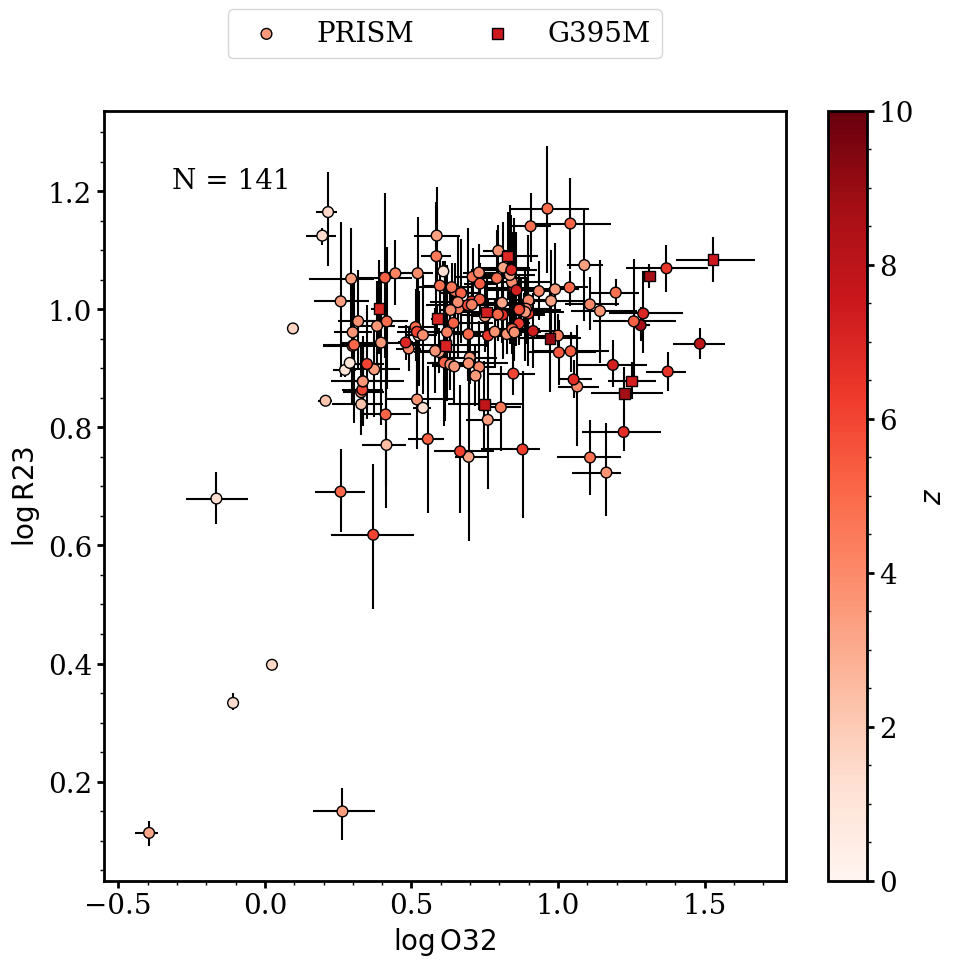

In [7]:
R23df_prism = line_fluxes_prism[snr3727_prism & snrhb_prism & snr5007_prism & snr4959_prism]
R23df_g395m = line_fluxes_g395m[snr3727_g395m & snrhb_g395m & snr5007_g395m & snr4959_g395m]
R23df_both = pd.merge(R23df_prism, R23df_g395m, on='id', how='inner')
plt.figure(figsize=(11,10))
plt.errorbar(x=np.log10(R23df_prism.O32), y=np.log10(R23df_prism.R23), 
             xerr=[sf.propagate_uncertainty_log10(R23df_prism.O32,R23df_prism.O32_ERR_16), sf.propagate_uncertainty_log10(R23df_prism.O32,R23df_prism.O32_ERR_84)], 
             yerr=[sf.propagate_uncertainty_log10(R23df_prism.R23,R23df_prism.R23_ERR_16), sf.propagate_uncertainty_log10(R23df_prism.R23,R23df_prism.R23_ERR_84)], 
             ls='None', c='k', zorder=-1)
plt.scatter(x=np.log10(R23df_prism.O32), y=np.log10(R23df_prism.R23), 
             marker='o', ec='k', c=R23df_prism.z_prism, cmap='Reds', vmin=0, vmax=10, s=60, label='PRISM')
plt.errorbar(x=np.log10(R23df_g395m.O32), y=np.log10(R23df_g395m.R23), 
             xerr=[sf.propagate_uncertainty_log10(R23df_g395m.O32,R23df_g395m.O32_ERR_16), sf.propagate_uncertainty_log10(R23df_g395m.O32,R23df_g395m.O32_ERR_84)], 
             yerr=[sf.propagate_uncertainty_log10(R23df_g395m.R23,R23df_g395m.R23_ERR_16), sf.propagate_uncertainty_log10(R23df_g395m.R23,R23df_g395m.R23_ERR_84)], 
             ls='None', c='k', zorder=-1)
plt.scatter(x=np.log10(R23df_g395m.O32), y=np.log10(R23df_g395m.R23), 
             marker='s', ec='k', c=R23df_g395m.z_g395m, cmap='Reds', vmin=0, vmax=10, s=60, label='G395M')

# a, b = np.polyfit(O32df_prism.z_prism, O32df_prism.Oiii_5007_prism/O32df_prism.Oii_3727_prism, 1)
# plt.plot(np.linspace(0,10,1000), a*np.linspace(0,10,1000)+b, label=f'O32 = {np.round(a, 1)}z + {np.round(b, 1)}')   

plt.colorbar(label='$z$')
plt.annotate(f'N = {len(R23df_prism)+len(R23df_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
plt.xlabel(r'$\log\rm{O32}$')
plt.ylabel(r'$\log\rm{R23}$')
# plt.axis([0, 10, 10**0, 10**2])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=2)
plt.savefig(FIGURES.joinpath('R23_O32.pdf'))
plt.show()

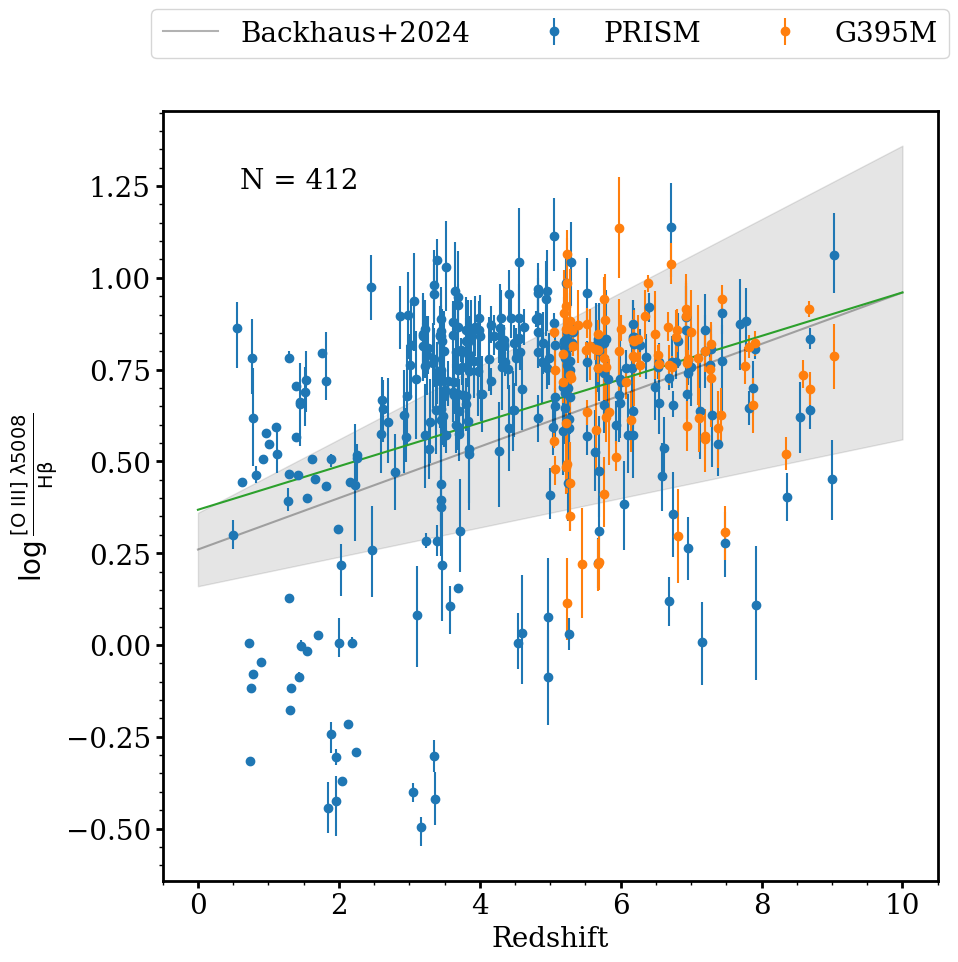

In [8]:
O3Hbdf_prism = line_fluxes_prism[snrhb_prism & snr5007_prism]
O3Hbdf_g395m = line_fluxes_g395m[snrhb_g395m & snr5007_g395m]
O3Hbdf_both = pd.merge(O3Hbdf_prism, O3Hbdf_g395m, on='id', how='inner')

plt.figure(figsize=(10,10))
plt.errorbar(x=O3Hbdf_prism.z_prism, y=np.log10(O3Hbdf_prism.OIII_Hb), 
             yerr=[sf.propagate_uncertainty_log10(O3Hbdf_prism.OIII_Hb,O3Hbdf_prism.OIII_Hb_ERR_16), sf.propagate_uncertainty_log10(O3Hbdf_prism.OIII_Hb,O3Hbdf_prism.OIII_Hb_ERR_84)], 
             ls='None', marker='o', label='PRISM')

plt.errorbar(x=O3Hbdf_g395m.z_g395m, y=np.log10(O3Hbdf_g395m.OIII_Hb), 
             yerr=[sf.propagate_uncertainty_log10(O3Hbdf_g395m.OIII_Hb,O3Hbdf_g395m.OIII_Hb_ERR_16), sf.propagate_uncertainty_log10(O3Hbdf_g395m.OIII_Hb,O3Hbdf_g395m.OIII_Hb_ERR_84)], 
             ls='None', marker='o', label='G395M')

z = np.linspace(0,10,1000)
plt.fill_between(z, 0.04*z + 0.16, 0.10*z + 0.36, color='k', alpha=0.1)
plt.plot(z, 0.07*z + 0.26, color='k', alpha=0.3, label='Backhaus+2024')

a, b = np.polyfit(O3Hbdf_prism.z_prism, np.log10(O3Hbdf_prism.OIII_Hb), 1)
plt.plot(np.linspace(0,10,1000), a*np.linspace(0,10,1000)+b)   

plt.annotate(f'N = {len(O3Hbdf_prism)+len(O3Hbdf_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
plt.xlabel('Redshift')
plt.ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
# plt.yscale('log')
# plt.axis([0, 10, 10**-1, 10**2])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=3)
plt.savefig(FIGURES.joinpath('OIIIHb_z.pdf'))
plt.show()

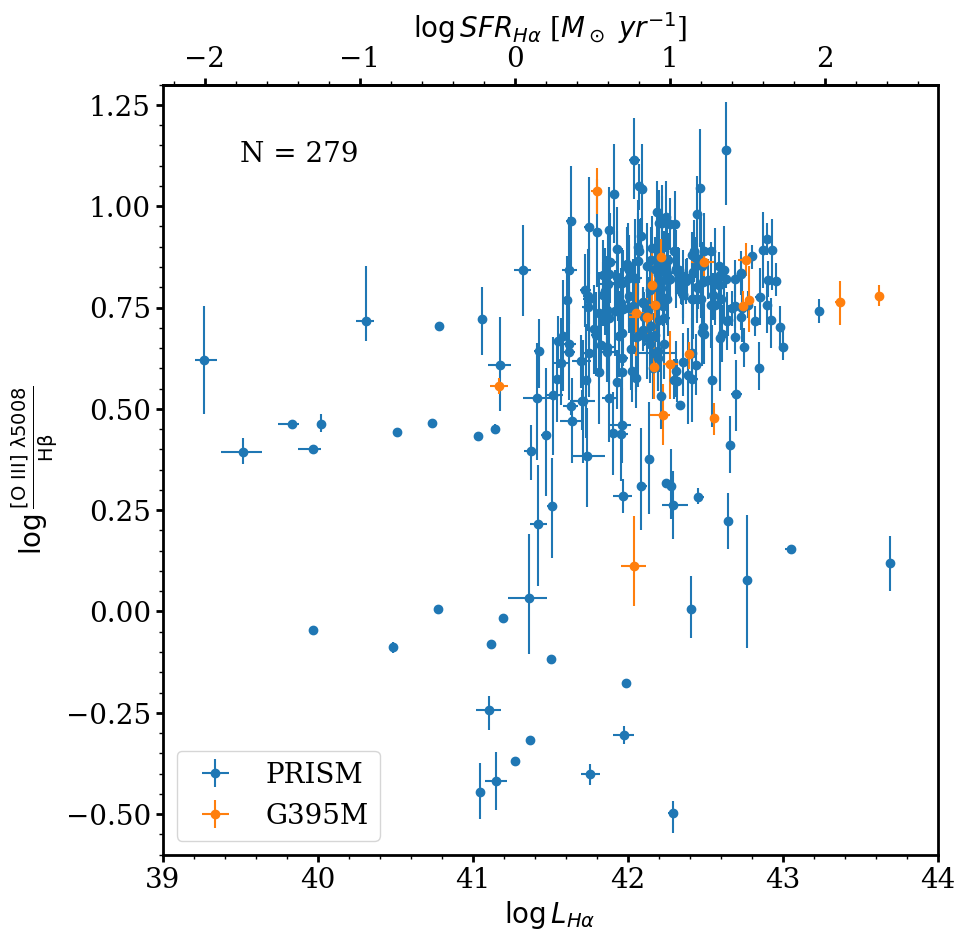

In [30]:
O3HbHadf_prism = line_fluxes_prism[snrhb_prism & snr5007_prism & snrha_prism]
O3HbHadf_g395m = line_fluxes_g395m[snrhb_g395m & snr5007_g395m & snrha_g395m]
O3HbHadf_both = pd.merge(O3HbHadf_prism, O3HbHadf_g395m, on='id', how='inner')

fig = plt.figure(figsize=(10,10))
gs = GridSpec(nrows=10, ncols=10)
gs.update(wspace=0, hspace=0)

ax = fig.add_subplot(gs[0:10, 0:10])
ax.errorbar(x=np.log10(O3HbHadf_prism.L_Ha), y=np.log10(O3HbHadf_prism.OIII_Hb), 
            xerr=[sf.propagate_uncertainty_log10(O3HbHadf_prism.L_Ha,O3HbHadf_prism.L_Ha_ERR_16), sf.propagate_uncertainty_log10(O3HbHadf_prism.L_Ha,O3HbHadf_prism.L_Ha_ERR_84)],
            yerr=[sf.propagate_uncertainty_log10(O3HbHadf_prism.OIII_Hb,O3HbHadf_prism.OIII_Hb_ERR_16), sf.propagate_uncertainty_log10(O3HbHadf_prism.OIII_Hb,O3HbHadf_prism.OIII_Hb_ERR_84)],
            ls='None', marker='o', label='PRISM')
ax.errorbar(x=np.log10(O3HbHadf_g395m.L_Ha), y=np.log10(O3HbHadf_g395m.OIII_Hb), 
            xerr=[sf.propagate_uncertainty_log10(O3HbHadf_g395m.L_Ha,O3HbHadf_g395m.L_Ha_ERR_16), sf.propagate_uncertainty_log10(O3HbHadf_g395m.L_Ha,O3HbHadf_g395m.L_Ha_ERR_84)],
            yerr=[sf.propagate_uncertainty_log10(O3HbHadf_g395m.OIII_Hb,O3HbHadf_g395m.OIII_Hb_ERR_16), sf.propagate_uncertainty_log10(O3HbHadf_g395m.OIII_Hb,O3HbHadf_g395m.OIII_Hb_ERR_84)],
            ls='None', marker='o', label='G395M')

plt.annotate(f'N = {len(O3HbHadf_prism)+len(O3HbHadf_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
plt.xlabel(r'$\log L_{H\alpha}$')
plt.ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
secax = ax.secondary_xaxis('top', functions=(lambda x: x-41.27, lambda x: x+41.27))
secax.set_xlabel(r'$\log SFR_{H\alpha}$ [$M_\odot~yr^{-1}$]', labelpad=6.0)
plt.axis([39, 44, -0.6, 1.3])
plt.legend()
plt.savefig(FIGURES.joinpath('OIIIHb_ha.pdf'))
plt.show()

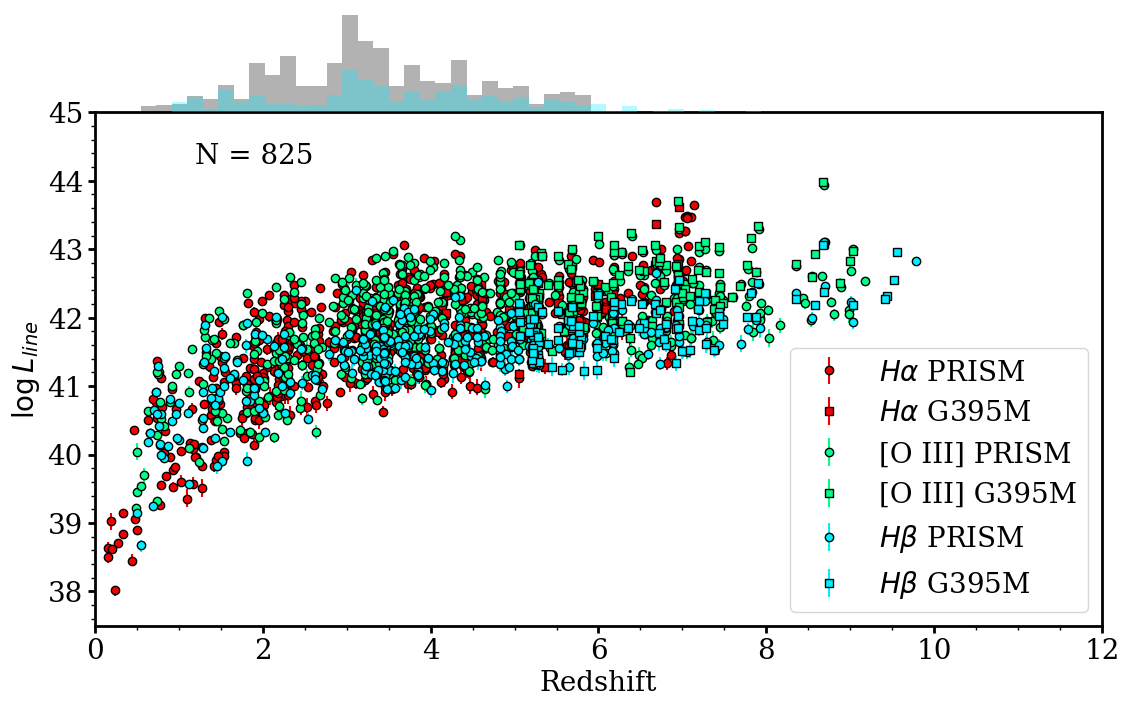

In [70]:
Hadf_prism = line_fluxes_prism[snrha_prism]
Hadf_g395m = line_fluxes_g395m[snrha_g395m]
Hadf_both = pd.merge(Hadf_prism, Hadf_g395m, on='id', how='inner')

Hbdf_prism = line_fluxes_prism[snrhb_prism]
Hbdf_g395m = line_fluxes_g395m[snrhb_g395m]
Hbdf_both = pd.merge(Hbdf_prism, Hbdf_g395m, on='id', how='inner')

O3df_prism = line_fluxes_prism[snr5007_prism]
O3df_g395m = line_fluxes_g395m[snr5007_g395m]
O3df_both = pd.merge(O3df_prism, O3df_g395m, on='id', how='inner')

fig = plt.figure(figsize=(13,8))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace=0, hspace=0)

ax = fig.add_subplot(gs[2:12, 0:10])
ax.errorbar(x=Hadf_prism.z_prism, y=np.log10(Hadf_prism.L_Ha), 
            yerr=[sf.propagate_uncertainty_log10(Hadf_prism.L_Ha,Hadf_prism.L_Ha_ERR_16), sf.propagate_uncertainty_log10(Hadf_prism.L_Ha,Hadf_prism.L_Ha_ERR_84)],
            ls='None', marker='o', mec='k', color='#F50000', label=r'$H\alpha$ PRISM')
ax.errorbar(x=Hadf_g395m.z_g395m, y=np.log10(Hadf_g395m.L_Ha), 
            yerr=[sf.propagate_uncertainty_log10(Hadf_g395m.L_Ha,Hadf_g395m.L_Ha_ERR_16), sf.propagate_uncertainty_log10(Hadf_g395m.L_Ha,Hadf_g395m.L_Ha_ERR_84)],
            ls='None', marker='s', mec='k', color='#F50000', label=r'$H\alpha$ G395M')

ax.errorbar(x=O3df_prism.z_prism, y=np.log10(O3df_prism.L_OIII_5007), 
            yerr=[sf.propagate_uncertainty_log10(O3df_prism.L_OIII_5007,O3df_prism.L_OIII_5007_ERR_16), sf.propagate_uncertainty_log10(O3df_prism.L_OIII_5007,O3df_prism.L_OIII_5007_ERR_84)],
            ls='None', marker='o', mec='k', color='#00FF87', label=r'[O III] PRISM')
ax.errorbar(x=O3df_g395m.z_g395m, y=np.log10(O3df_g395m.L_OIII_5007), 
            yerr=[sf.propagate_uncertainty_log10(O3df_g395m.L_OIII_5007,O3df_g395m.L_OIII_5007_ERR_16), sf.propagate_uncertainty_log10(O3df_g395m.L_OIII_5007,O3df_g395m.L_OIII_5007_ERR_84)],
            ls='None', marker='s', mec='k', color='#00FF87', label=r'[O III] G395M')

ax.errorbar(x=Hbdf_prism.z_prism, y=np.log10(Hbdf_prism.L_Hb), 
            yerr=[sf.propagate_uncertainty_log10(Hbdf_prism.L_Hb,Hbdf_prism.L_Hb_ERR_16), sf.propagate_uncertainty_log10(Hbdf_prism.L_Hb,Hbdf_prism.L_Hb_ERR_84)],
            ls='None', marker='o', mec='k', color='#00EFFF', label=r'$H\beta$ PRISM')
ax.errorbar(x=Hbdf_g395m.z_g395m, y=np.log10(Hbdf_g395m.L_Hb), 
            yerr=[sf.propagate_uncertainty_log10(Hbdf_g395m.L_Hb,Hbdf_g395m.L_Hb_ERR_16), sf.propagate_uncertainty_log10(Hbdf_g395m.L_Hb,Hbdf_g395m.L_Hb_ERR_84)],
            ls='None', marker='s', mec='k', color='#00EFFF', label=r'$H\beta$ G395M')



ax.annotate(f'N = {len(Hadf_prism)+len(Hadf_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
ax.set_xlabel('Redshift')
ax.set_ylabel(r'$\log L_{line}$')

ax.axis([0,12,37.5,45])
ax.legend()

bins = np.arange(0,15,0.25)
ax1 = fig.add_subplot(gs[0:2, 0:10], frameon=False)
ax1.tick_params(left=False, labelleft=False, right = False , labelbottom = False, bottom = False, labeltop = False, top = False, which = 'both')
ax1.hist(Hadf_prism.z_prism, bins=bins, color='black', alpha = .3)
ax1.hist(Hbdf_prism.z_prism, bins=bins, color='#00EFFF', alpha = .3)


plt.savefig(FIGURES.joinpath('Ha_z.pdf'))
plt.show()

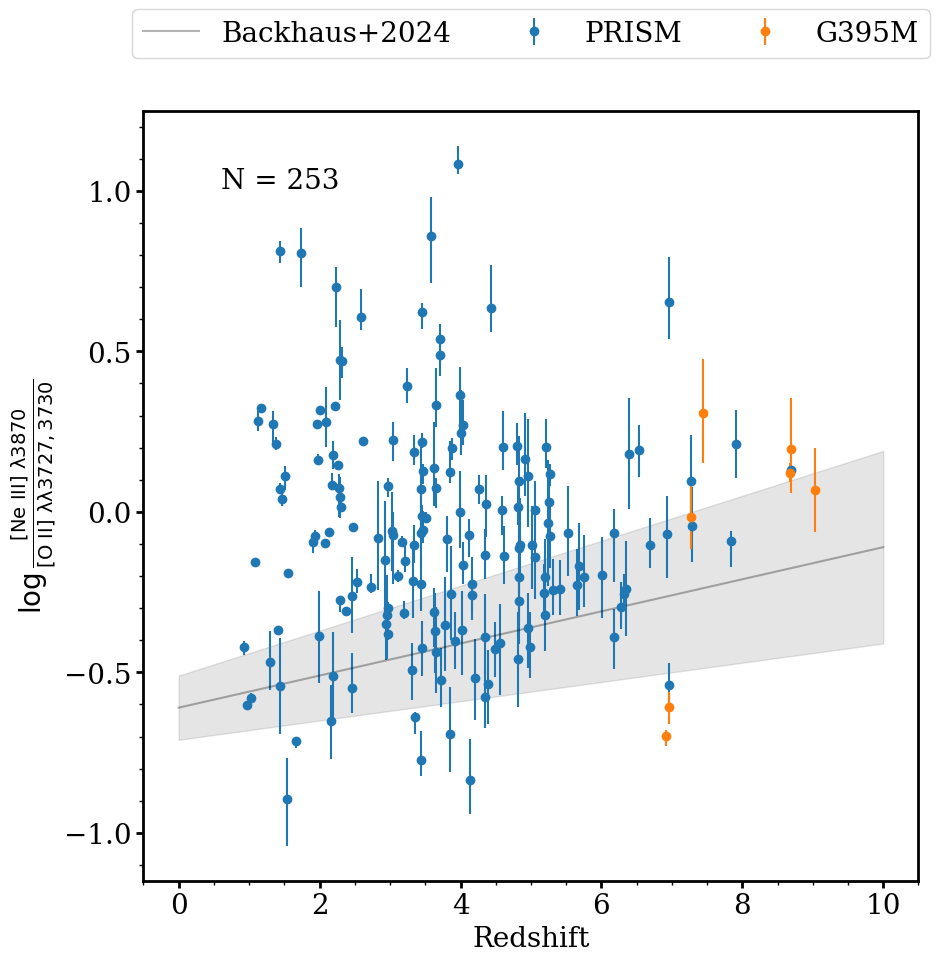

In [71]:
Ne3O2df_prism = line_fluxes_prism[snr3727_prism & snr3869_prism]
Ne3O2df_g395m = line_fluxes_g395m[snr3727_g395m & snr3869_g395m]
Ne3O2df_both = pd.merge(Ne3O2df_prism, Ne3O2df_g395m, on='id', how='inner')
plt.figure(figsize=(10,10))
plt.errorbar(x=Ne3O2df_prism.z_prism, y=np.log10(Ne3O2df_prism.NeIII_OII), 
             yerr=[sf.propagate_uncertainty_log10(Ne3O2df_prism.NeIII_OII, Ne3O2df_prism.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O2df_prism.NeIII_OII, Ne3O2df_prism.NeIII_OII_ERR_84)], 
             ls='None', marker='o', label='PRISM')
plt.errorbar(x=Ne3O2df_g395m.z_g395m, y=np.log10(Ne3O2df_g395m.NeIII_OII), 
             yerr=[sf.propagate_uncertainty_log10(Ne3O2df_g395m.NeIII_OII, Ne3O2df_g395m.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O2df_g395m.NeIII_OII, Ne3O2df_g395m.NeIII_OII_ERR_84)], 
             ls='None', marker='o', label='G395M')

z = np.linspace(0,10,1000)
plt.fill_between(z, 0.03*z - 0.71, 0.07*z - 0.51, color='k', alpha=0.1)
plt.plot(z, 0.05*z - 0.61, color='k', alpha=0.3, label='Backhaus+2024')

plt.annotate(f'N = {len(O32df_prism)+len(O32df_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
plt.xlabel('Redshift')
plt.ylabel(r'$\log\frac{\rm{[Ne~III]}~\lambda3870}{\rm{[O~II]}~\lambda\lambda3727,3730}$')

# plt.yscale('log')
# plt.axis([0, 10, 10**-2, 10**2])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=3)
plt.savefig(FIGURES.joinpath('NeIIIOII_z.pdf'))
plt.show()

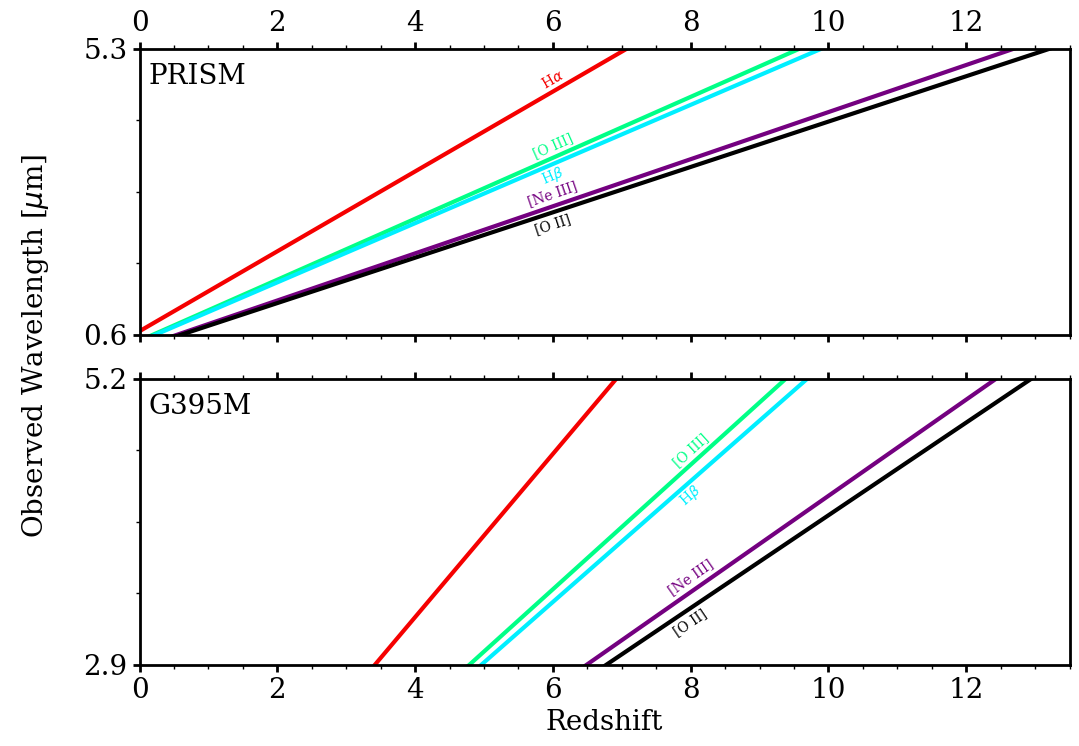

In [56]:
ha = 6563
oiii = 5008
neiii = 3870
hb = 4862
oii = 3728

lines = [ha, oiii, hb, neiii, oii]
labels = [r'H$\alpha$', '[O III]', r'H$\beta$', '[Ne III]', '[O II]']
line_colors = ['#F50000', '#00FF87', '#00EFFF', '#740080', '#000000']
offsets_prism = [.2, .2, -.2, .2, -.2]
offsets_g395m = [.12, .12, -.12, .12, -.12]
z = np.linspace(0, 15, 1000)

def get_zmin_prism(wave):
    return 6000/wave - 1
def get_zmax_prism(wave):
    return 53000/wave - 1

def get_zmin_g395m(wave):
    return 29000/wave - 1
def get_zmax_g395m(wave):
    return 52000/wave - 1
def get_line_rotation(x1,x2,y1,y2):
    return np.rad2deg(np.arctan((y2 - y1)/(x2 - x1)))

fig = plt.figure(figsize=(12,8))
gs = GridSpec(nrows=10, ncols=10)
gs.update(wspace=0, hspace=2)

ax0 = fig.add_subplot(gs[0:5, 0:10])
for line, label, line_color, offset in zip(lines,labels,line_colors,offsets_prism):
    observed_wavelengths = line*(1+z)/10**4
    ax0.plot(z, observed_wavelengths, lw=3, color=line_color, label=label)
    rotn = get_line_rotation(z[0], z[-1], observed_wavelengths[0], observed_wavelengths[-1])
    ax0.annotate(label, xy=(6,line*(1+6)/10**4+offset), fontsize=10, va='center', ha='center', color=line_color,
                 rotation=rotn, transform_rotates_text=True, rotation_mode='anchor')
ax0.annotate('PRISM',  xy=(0.01,0.95), va='top', ha='left', xycoords='axes fraction')
# ax0.legend()
ax0.axis([0,13.5,0.6,5.3])
ax0.set_yticks([0.6,5.3])
ax0.tick_params(labelbottom=False, which='both', top=True, labeltop=True)
# ax0.grid(alpha=0.5, zorder=-5)

ax1 = fig.add_subplot(gs[5:10, 0:10])
for line, label, line_color, offset in zip(lines,labels,line_colors,offsets_g395m):
    observed_wavelengths = line*(1+z)/10**4
    ax1.plot(z, observed_wavelengths, lw=3, color=line_color, label=label)
    rotn = get_line_rotation(z[0], z[-1], observed_wavelengths[0], observed_wavelengths[-1])
    ax1.annotate(label, xy=(8,line*(1+8)/10**4+offset), fontsize=10, va='center', ha='center', color=line_color,
                 rotation=rotn, transform_rotates_text=True, rotation_mode='anchor')
ax1.axis([0,13.5,2.9,5.2])
ax1.annotate('G395M',  xy=(0.01,0.95), va='top', ha='left', xycoords='axes fraction')
ax1.set_yticks([2.9,5.2])
ax1.tick_params(which='both', top=True)
plt.xlabel('Redshift')
plt.annotate(r'Observed Wavelength [$\mu$m]', va='center', ha='center', xy=(0.03,0.5), xycoords='figure fraction', rotation=90)
plt.savefig(FIGURES.joinpath('coverage.pdf'))
plt.show()

In [92]:
egs_photometry = list(RUBIES_DATA.glob('egs*sps*.fits'))
egs_photometrydf = (Table.read(egs_photometry[0], format='fits')
      .to_pandas()
)
uds_photometry = list(RUBIES_DATA.glob('uds*sps*.fits'))
uds_photometrydf = (Table.read(uds_photometry[0], format='fits')
      .to_pandas()
)

In [94]:
egs_photometrydf

,id,ra,dec,z_spec,z_16,z_50,z_84,mtot_16,mtot_50,mtot_84,...,UV_84,VJ_16,VJ_50,VJ_84,gi_16,gi_50,gi_84,ug_16,ug_50,ug_84
0,314,215.047219,52.873545,1.0792,1.066959,1.081151,1.093502,7.663324,7.959884,8.144108,...,0.571482,-0.322055,-0.197852,-0.061830,-0.114493,-0.033172,0.057216,0.368097,0.488109,0.643127
1,482,215.055700,52.881958,2.4795,2.466267,2.479461,2.492917,10.342180,10.546886,10.728413,...,1.516407,1.639147,1.717575,1.788404,1.209361,1.261519,1.315392,1.401962,1.486741,1.564780
2,761,215.048281,52.879975,3.4749,3.460055,3.473852,3.488612,8.999971,9.286930,9.565404,...,0.614665,0.157427,0.333753,0.524187,0.138138,0.183933,0.219282,0.445031,0.518839,0.602441
3,920,215.052344,52.884268,3.6213,3.606445,3.618377,3.634835,8.759178,9.008563,9.229348,...,0.335386,-0.328727,-0.104180,0.017901,-0.145954,-0.105428,-0.075021,0.285114,0.329636,0.365150
4,921,215.049804,52.882520,4.6191,4.606992,4.620721,4.633611,7.999528,8.249279,8.503069,...,0.507230,-0.245120,-0.027888,0.162618,-0.101650,-0.017435,0.053855,0.278632,0.370020,0.483905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,975193,214.967248,52.963630,6.9899,6.990930,7.001648,7.007428,8.124916,8.336600,8.582315,...,0.364252,-1.342373,-1.122922,-0.803765,-0.529217,-0.459257,-0.379925,-0.132223,-0.073191,-0.000226
632,978590,214.830660,52.887775,7.7616,7.747797,7.760693,7.774701,8.987303,9.334288,9.755920,...,1.200153,0.329156,0.861999,1.471908,0.431347,0.710257,1.050598,0.772538,0.956267,1.150985
633,980841,214.844770,52.892109,8.6937,8.680703,8.695250,8.707724,9.328617,9.623724,9.887245,...,0.739568,-0.194869,0.190751,0.642494,0.063064,0.219559,0.373995,0.349845,0.428431,0.510854
634,986615,214.950932,52.957040,6.5036,6.488228,6.499406,6.515163,8.763231,9.048732,9.360532,...,0.539225,-0.309389,-0.111038,0.118091,-0.107790,-0.006101,0.099194,0.397051,0.454037,0.514091


In [104]:
uds_photometrydf.columns

Index(['id_v70', 'id', 'ra', 'dec', 'z_spec', 'z_16', 'z_50', 'z_84',
       'mtot_16', 'mtot_50', 'mtot_84', 'mstar_16', 'mstar_50', 'mstar_84',
       'met_16', 'met_50', 'met_84', 'mwa_16', 'mwa_50', 'mwa_84', 'dust2_16',
       'dust2_50', 'dust2_84', 'dust_index_16', 'dust_index_50',
       'dust_index_84', 'dust1_fraction_16', 'dust1_fraction_50',
       'dust1_fraction_84', 'logfagn_16', 'logfagn_50', 'logfagn_84',
       'sfr10_16', 'sfr10_50', 'sfr10_84', 'sfr30_16', 'sfr30_50', 'sfr30_84',
       'sfr100_16', 'sfr100_50', 'sfr100_84', 'ssfr10_16', 'ssfr10_50',
       'ssfr10_84', 'ssfr30_16', 'ssfr30_50', 'ssfr30_84', 'ssfr100_16',
       'ssfr100_50', 'ssfr100_84', 'rest_U_16', 'rest_U_50', 'rest_U_84',
       'rest_V_16', 'rest_V_50', 'rest_V_84', 'rest_J_16', 'rest_J_50',
       'rest_J_84', 'rest_u_16', 'rest_u_50', 'rest_u_84', 'rest_g_16',
       'rest_g_50', 'rest_g_84', 'rest_i_16', 'rest_i_50', 'rest_i_84',
       'UV_16', 'UV_50', 'UV_84', 'VJ_16', 'VJ_50', 'VJ_84',

In [103]:
photometrydf = pd.concat([egs_photometrydf, uds_photometrydf])

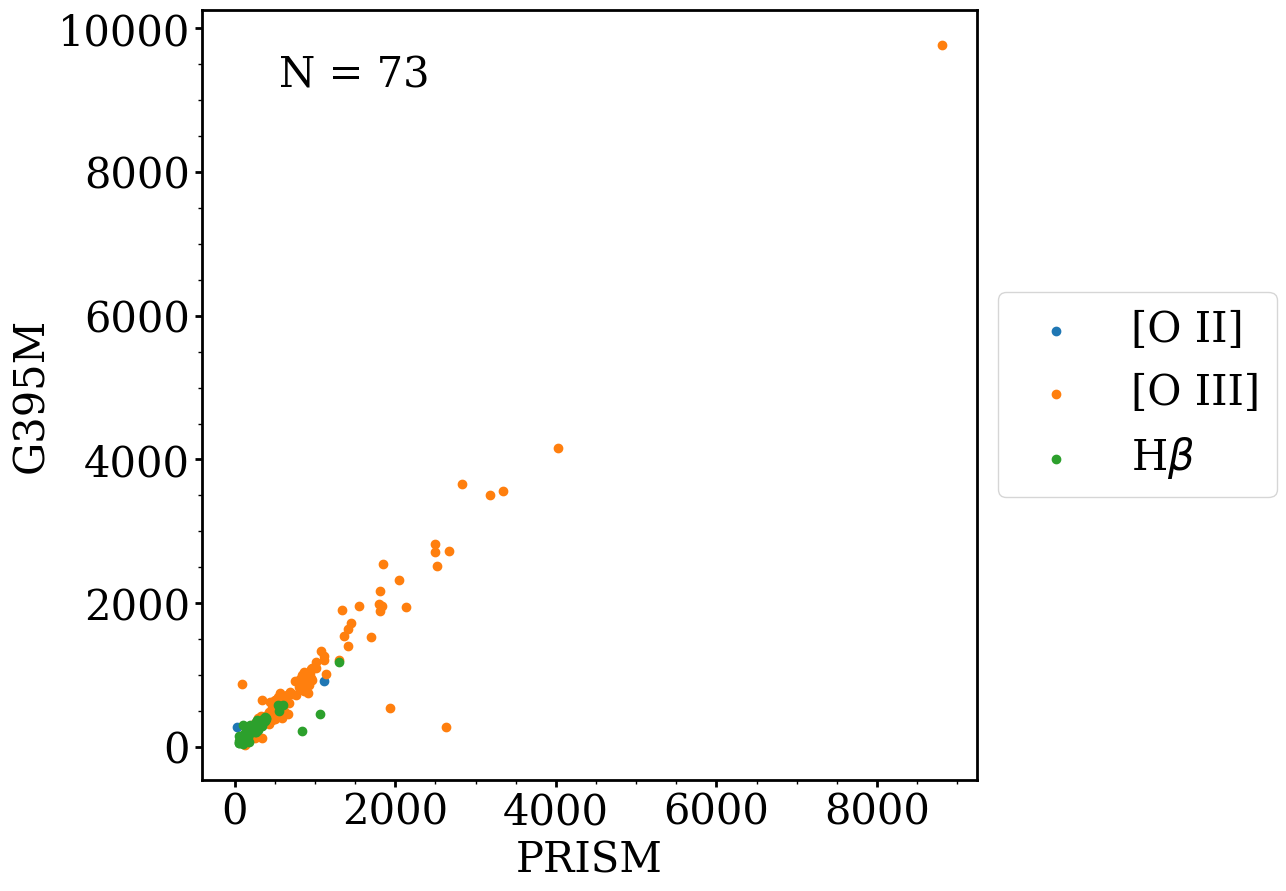

In [73]:
O2df_prism = line_fluxes_prism[snr3727_prism]
O2df_g395m = line_fluxes_g395m[snr3727_g395m]
O2df_both = pd.merge(O2df_prism, O2df_g395m, on='id', how='inner')

O3df_prism = line_fluxes_prism[snr5007_prism]
O3df_g395m = line_fluxes_g395m[snr5007_g395m]
O3df_both = pd.merge(O3df_prism, O3df_g395m, on='id', how='inner')

hbdf_prism = line_fluxes_prism[snrhb_prism]
hbdf_g395m = line_fluxes_g395m[snrhb_g395m]
hbdf_both = pd.merge(hbdf_prism, hbdf_g395m, on='id', how='inner')

plt.figure(figsize=(10,10))
plt.scatter(O2df_both.Oii_3727_prism, O2df_both.Oii_3727_g395m, label='[O II]')
plt.scatter(O3df_both.Oiii_5007_prism, O3df_both.Oiii_5007_g395m, label='[O III]')
plt.scatter(hbdf_both.Hb_prism, hbdf_both.Hb_g395m, label=r'H$\beta$')


plt.annotate(f'N = {len(hbdf_both)}', xy=(0.1, 0.9), xycoords='axes fraction')
plt.xlabel('PRISM')
plt.ylabel('G395M')
# plt.yscale('log')
# plt.axis([0, 10, 10**-3, 10**3])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.savefig(FIGURES.joinpath('O32_z.pdf'))
plt.show()